# Análise Exploratória sobre os Dados de Trajetória

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from shapely.geometry import LineString, MultiLineString
from shapely.wkt import loads
import geopandas as gpd
from Utils.db import DataBaseConnector

warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("trajectories_to_gru_2024_01_01_within_C100.csv", sep=';')
df.head()

,flight_id,aircraft_id,reg,equip,fr_callsign,schd_from,schd_to,real_to,date,tf_callsign,adep,ades,runway,acfttype,eventtype,arr,flight_path,flight_path_c100
0,863160346,14977959,PTMUF,B77W,TAM8085,LHR,GRU,GRU,2024-01-01,TAM8085,EGLL,SBGR,10R,B77W,ARR,2024-01-01 08:10:41.633,"LINESTRING (-32.31014 -0.33952, -32.40214 -0.5...",MULTILINESTRING ((-45.77894425397203 -21.89260...
1,863105832,15205486,CCBGS,B789,TAM8149,LIS,GRU,GRU,2024-01-01,TAM8149,LPPT,SBGR,10R,B789,ARR,2024-01-01 00:17:26.297,"LINESTRING (-46.25928 -22.61517, -46.26767 -22...","LINESTRING (-46.25928 -22.61517, -46.26767 -22..."
2,863127190,4805282,CSTUB,A339,TAP083,LIS,GRU,GRU,2024-01-01,TAP083,LPPT,SBGR,10R,A339,ARR,2024-01-01 03:04:52.557,"LINESTRING (-35.0529 -5.54306, -35.08356 -5.60...",LINESTRING (-45.819541224869084 -21.8808528815...
3,863155888,14975371,PTMUC,B77W,TAM8071,FRA,GRU,GRU,2024-01-01,TAM8071,EDDF,SBGR,10R,B77W,ARR,2024-01-01 08:05:32.557,"LINESTRING (-32.34934 -0.44928, -32.36153 -0.4...",LINESTRING (-45.83354808227138 -21.87679899319...
4,863186619,794989,HP9922CMP,B39M,CMP743,PTY,GRU,GRU,2024-01-01,CMP743,MPTO,SBGR,10R,B39M,ARR,2024-01-01 06:19:31.797,"LINESTRING (-74.96414 5.4521, -74.91679 5.4096...",LINESTRING (-48.073081001310776 -22.6746514106...


In [16]:
# Convertendo as strings para objetos LineString
df['flight_path'] = df['flight_path'].astype(str)
df['flight_path_c100'] = df['flight_path_c100'].astype(str)

In [20]:
# Convertendo as strings para objetos LineString
df['flight_path'] = df['flight_path'].apply(loads)
df['flight_path_c100'] = df['flight_path_c100'].apply(loads)

TypeError: Expected bytes or string, got float

In [8]:
def plot_linestrings(df, column, ax, color='blue', label=None):
    for geom in df[column]:
        if isinstance(geom, LineString):
            x, y = geom.xy
            ax.plot(x, y, color=color, label=label if label else column)
            label = None  # Evitar duplicação de rótulos na legenda
        elif isinstance(geom, MultiLineString):
            for line in geom:
                x, y = line.xy
                ax.plot(x, y, color=color, label=label if label else column)
                label = None

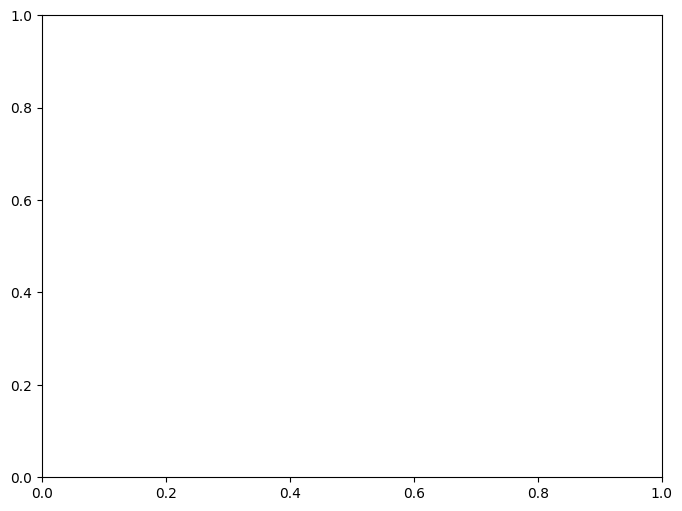

In [10]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar flight_path e flight_path_c100
plot_linestrings(df, 'flight_path', ax, color='blue', label='Flight Path')